<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


***
<h3 style="font-size: 45px; text-align: center; font-family: Copperplate; color: darkblue; background-color: white;">EDA</h3>


In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import regex as re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
real = pd.read_csv(r'C:\Users\lenovo\Desktop\archive\News _dataset\True.csv')
fake = pd.read_csv(r"C:\Users\lenovo\Desktop\archive\News _dataset\Fake.csv")

**Let's start by first adding the target value to our real and fake news as 1 , 0 then concatenating both datasets** + **let's shuffle our data and set the seed to ensure reproducibility**

In [3]:
real['target']=1
fake['target']=0

data = pd.concat([real , fake] , ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


display(data.head())
print('-'*40)

print('shape' , data.shape)
print('-'*40)

display(data.dtypes )
print('-'*40)

display(data.isna().sum())


,title,text,subject,date,target
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


----------------------------------------
shape (44898, 5)
----------------------------------------


title      object
text       object
subject    object
date       object
target      int64
dtype: object

----------------------------------------


title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [4]:
data.target.value_counts(normalize=True)


target
0    0.522985
1    0.477015
Name: proportion, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\3768584518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(x='target', data=dataFile,palette='Blues_d')


<Axes: xlabel='target', ylabel='count'>

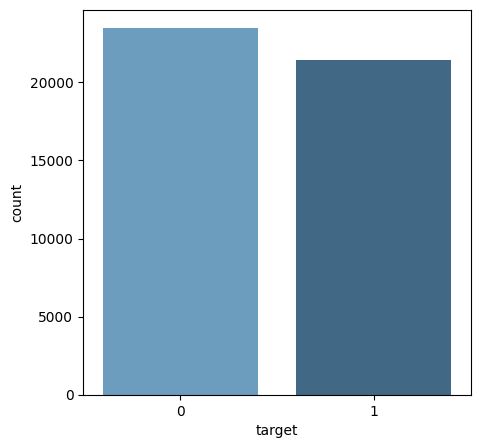

In [5]:
import seaborn as sns  # Import de la bibliothèque Seaborn pour la visualisation de données

def create_distribution(dataFile):
    plt.figure(figsize=(5, 5)) 

    return sns.countplot(x='target', data=dataFile,palette='Blues_d')
create_distribution(data)



 <div style = "height: 230px;
  width: 800px;
  border:5px inset blue;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
        
 <p>
     <ol>
         <li>There are a total of 5 columns and 44898 rows in the data</li>
         <li>target is our target/label variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 47.7%</li><li>fake :52.2%</li></ul></li>
         <li>There are no missing values</li>
    </ol>
 </p>
    </h3>

</div>

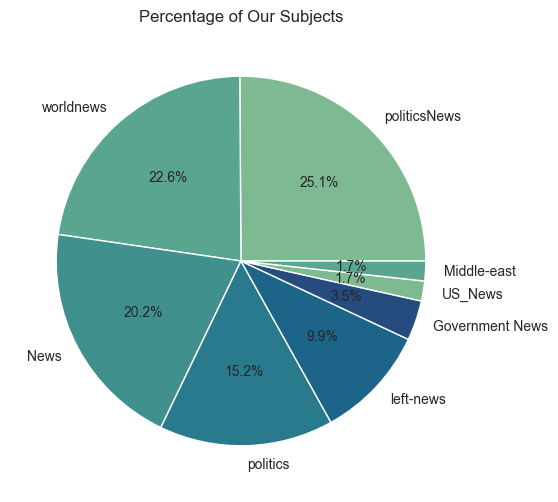

In [6]:

sns.set_palette("crest")  
sns.set_style("whitegrid")  

plt.figure(figsize=(6, 6)) 
data['subject'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Our Subjects')
plt.ylabel(None) 
plt.show()


In [7]:
# def encode_subject(label):
#     if label  in ["politicsNews",'politics' ,'Government News','left-news']:
#         return "politics"
#     elif label  in ['worldnews' ,'News']:
#         return "world news"
#     else:
#         return "US_News"

# data["subject"]=data["subject"].apply(encode_subject) 
data.subject=data.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})


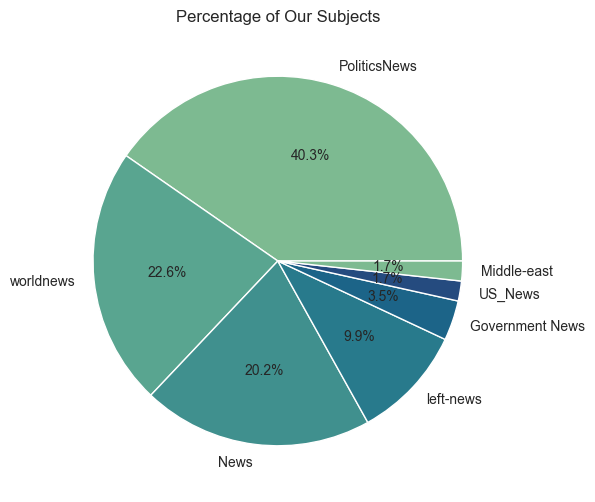

In [8]:
sns.set_palette("crest")  
sns.set_style("whitegrid")  

plt.figure(figsize=(6, 6)) 
data['subject'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Our Subjects')
plt.ylabel(None) 
plt.show()


***

#### As an estimate what subjects have more fake news **rs1** , and which of them have real news **rs2** ?


In [9]:
rs1 = data[data['target'] == 0].groupby(['subject'], as_index=False).size()
rs1 = rs1.rename(columns={'size': 'count'}).sort_values(by='count', ascending=False)
print(rs1)

           subject  count
2             News   9050
3     PoliticsNews   6841
5        left-news   4459
0  Government News   1570
4          US_News    783
1      Middle-east    778


In [10]:
rs2 = data[data['target'] == 1].groupby(['subject'], as_index=False).size()
rs2 = rs2.rename(columns={'size': 'count'}).sort_values(by='count', ascending=False)
print(rs2)

        subject  count
0  PoliticsNews  11272
1     worldnews  10145


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\3471600968.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x='count', y='subject', data=rs1, palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\3471600968.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x='count', y='subject', data=rs2, palette='viridis')


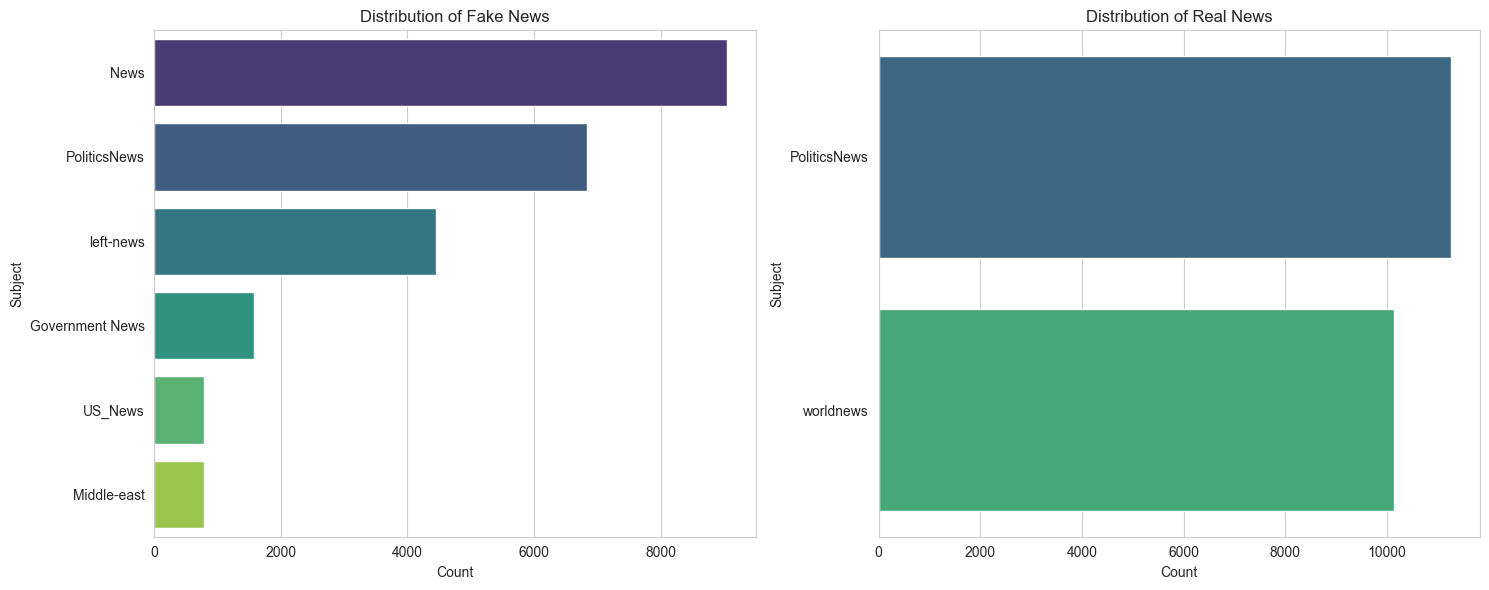

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Fake news distribution
sns.barplot(ax=axs[0], x='count', y='subject', data=rs1, palette='viridis')
axs[0].set_title('Distribution of Fake News')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Subject')

# Real news distribution
sns.barplot(ax=axs[1], x='count', y='subject', data=rs2, palette='viridis')
axs[1].set_title('Distribution of Real News')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Subject')

# Adjust layout
plt.tight_layout()
plt.show()


 <div style = "height: 340px;
  width: 800px;
  border:5px inset blue;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
    <p>
        <ol>
            <li>The subjects that hold more real news are:
                <ul>
                    <li>PoliticsNews - 49.71%</li>
                    <li>worldnews - 44.93%</li>
                </ul>
            </li>
            <li>The subjects that hold more fake news are:
                <ul>
                    <li>News - 39.09%</li>
                    <li>PoliticsNews - 29.59%</li>
                    <li>left-news - 19.28%</li>
                </ul>
            </li>
        </ol>
    </p>
</div>


***
### how is the Distribution of some features ?

In [12]:
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')

data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month_name()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\3320067987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index, palette='crest')


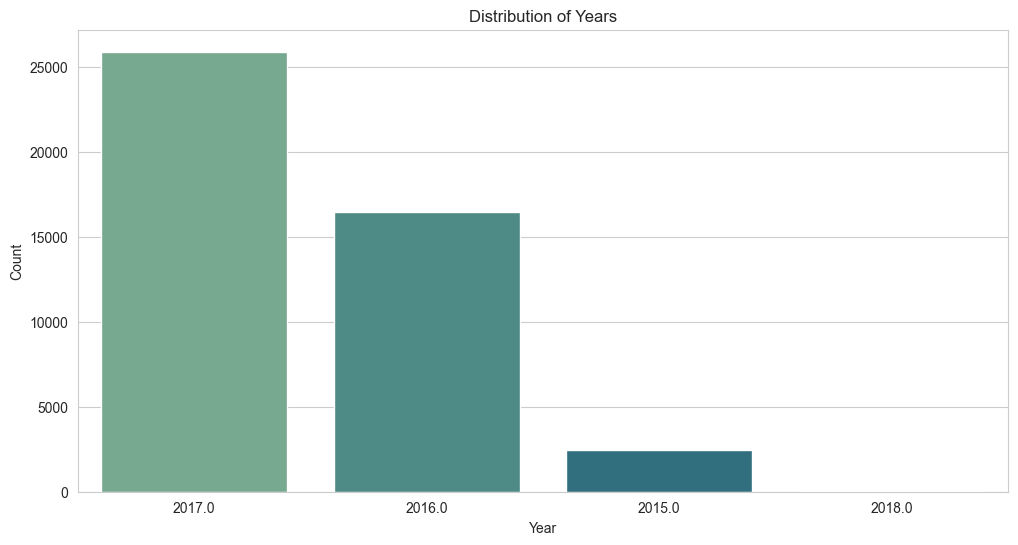

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index, palette='crest')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\1810723891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data, order=data['Month'].value_counts().index, palette='crest')


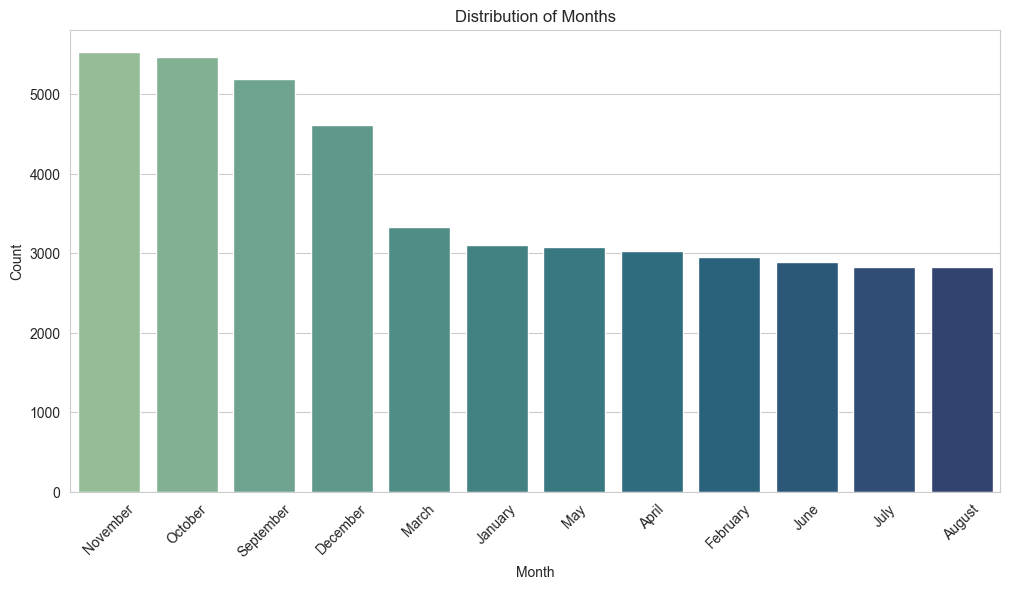

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, order=data['Month'].value_counts().index, palette='crest')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16216\3433019004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=data , order=data['subject'].value_counts().index, palette='crest')


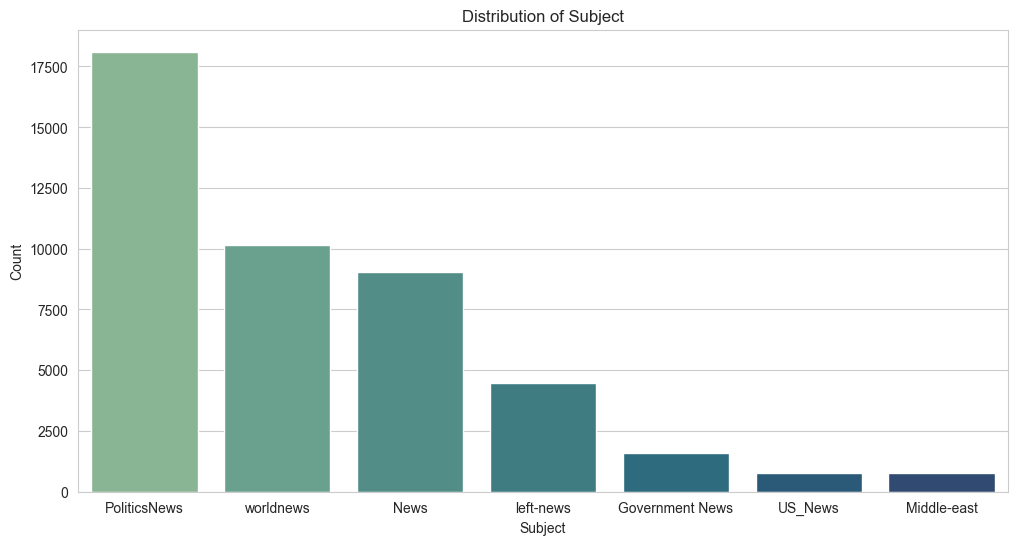

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=data , order=data['subject'].value_counts().index, palette='crest')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

***
### Question: Is there a link between the title length and the target variable?



In [16]:
import nltk
df = pd.DataFrame()
def count_words(column):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(column)
    return len(new_words)

df["n_words_in_title"]=data["title"].apply(count_words)
df["n_words_in_text"]=data["text"].apply(count_words)
df['target']=data['target']

<Axes: title={'center': 'Number of words in the title.'}, xlabel='target', ylabel='n_words_in_title'>

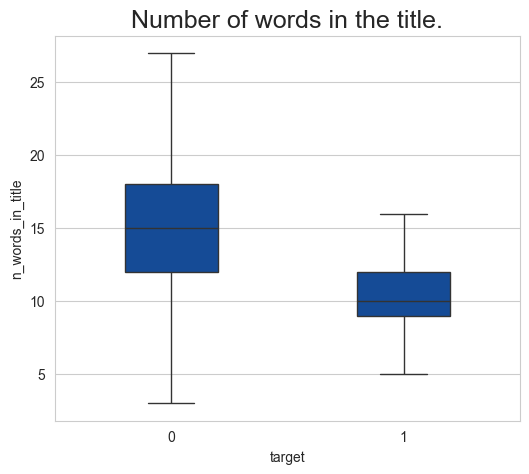

In [17]:
fig=plt.figure(figsize=[6,5])
# fig.patch.set_alpha(0.7)

plt.title("Number of words in the title.",size=18)
sns.boxplot(data=df, x="target",y="n_words_in_title",showfliers=False,width=0.4,color="#0047AB")

<Axes: title={'center': 'Number of words in the text.'}, xlabel='target', ylabel='n_words_in_text'>

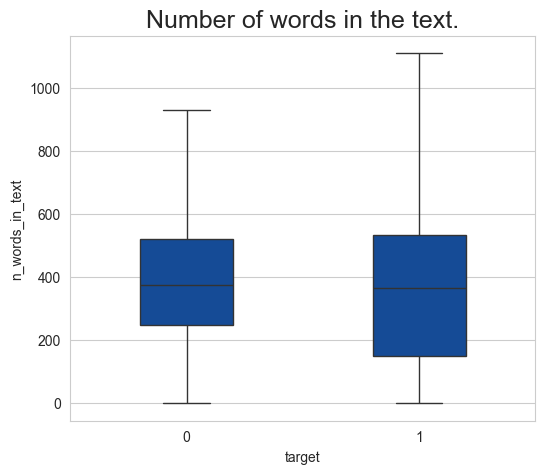

In [18]:
fig=plt.figure(figsize=[6,5])
# fig.patch.set_alpha(0.7)

plt.title("Number of words in the text.",size=18)
sns.boxplot(data=df, x="target",y="n_words_in_text",showfliers=False,width=0.4,color="#0047AB")

<div style="height: 90px;
            width: 800px;
            border: 5px inset blue;
            background-color: #e2e1e9;">
    <h3 style="color: black;">
        <ul>
            <li>It seems that fake news have longer titles, but relatively shorter content (text).</li>
        </ul>
    </h3>
</div>


***
<h3 style="font-size: 45px; text-align: center; font-family: Copperplate; color: darkblue; background-color: white;">Text pre procesing</h3>


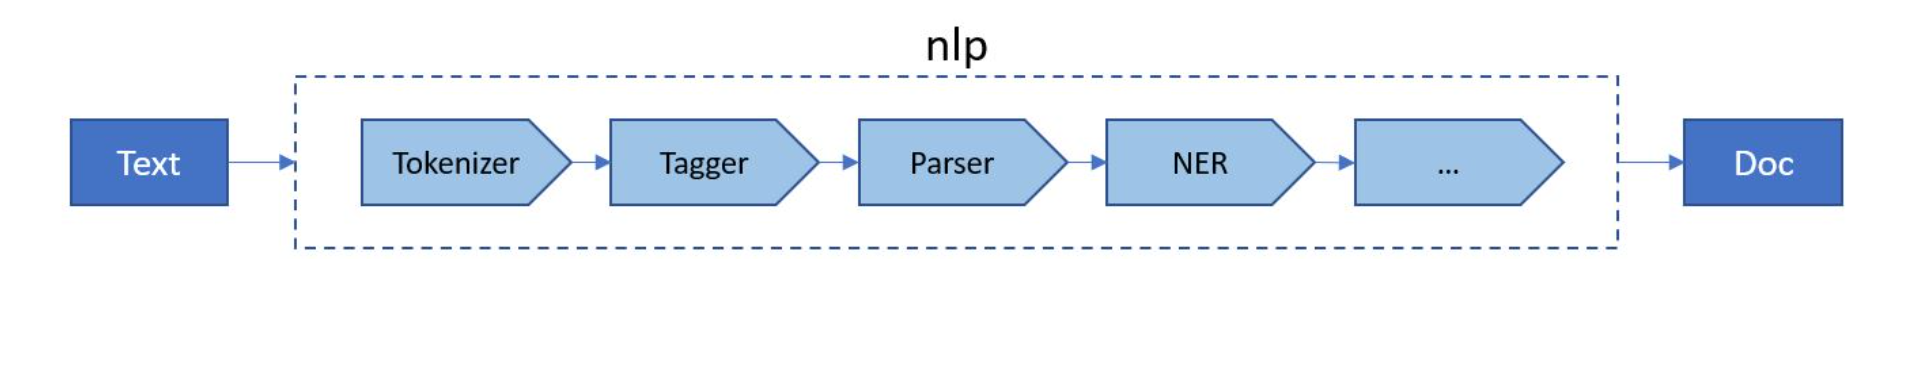

In [19]:
data['final'] =  data['title'] + " " + data['subject']


In [20]:
# import re  # Import the regular expressions module
# import string  # Import the string module containing punctuation

# def wordopt(text):
#     # Convert the entire text to lowercase
#     text = text.lower()

#     # Remove text within square brackets, including the brackets
#     text = re.sub('\[.*?\]', '', text)

#     # Replace all non-alphabetic characters with a space
#     text = re.sub("\\W", " ", text)

#     # Remove URLs
#     text = re.sub('https?://\S+|www\.\S+', '', text)

#     # Remove HTML tags
#     text = re.sub('<.*?>', '', text)

#     # Remove punctuation
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

#     # Remove words containing digits
#     text = re.sub('\w*\d\w*', '', text)

#     return text  # Return the preprocessed text

In [21]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def wordopt(text, use_stemming=True, use_lemmatization=False):
    # General text preprocessing
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)

    if use_stemming:
        # Apply stemming to each token
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        tokens = stemmed_tokens
    
    if use_lemmatization:
        # Apply lemmatization to each token
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        tokens = lemmatized_tokens

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***
<div style="height: 150px;
        width: 1200px;
        border: 5px inset blue;
        background-color: #e2e1e9;">
    <h3 style="color: black;">
        <ul>
            <li> Adding stemming to the text preprocessing pipeline resulted in an increase in prediction accuracy. This improvement can be attributed to the fact that stemming reduces words to their base form, which helps in generalizing and reducing the vocabulary size. As a result, the model may perform better by capturing the underlying patterns and features more effectively. </li>
        </ul>
    </h3>
</div>

***

In [22]:
data['final'] = data['final'].apply(wordopt)
data.final

0        break gop chairman grassley ha had enough dema...
1        fail gop candid rememb in hilari mock eulog vi...
2        mike penc s new dc neighbor are hilari troll h...
3        california ag pledg to defend birth control in...
4        az rancher live on us mexico border destroy na...
                               ...                        
44893    nigeria say u s agre delay million fighter pla...
44894                   boiler room fatal illus middl east
44895    atheist sue governor of texa over display on c...
44896    republican tax plan would deal financi hit to ...
44897    u n refuge commission say australia must stop ...
Name: final, Length: 44898, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test,y_train,y_test = train_test_split(data['final'],data['target'],test_size=0.3)
# cv = CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))

# cv_train = cv.fit_transform(X_train)
# cv_test = cv.transform(X_test)
vectorization = TfidfVectorizer()
cv_train = vectorization.fit_transform(X_train)
cv_test = vectorization.transform(X_test)

print('Train shape: ',cv_train.shape)
print('Test shape: ',cv_test.shape)

Train shape:  (31428, 12062)
Test shape:  (13470, 12062)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb = MultinomialNB()
nb.fit(cv_train, y_train)
pred_nb = nb.predict(cv_test)
score = accuracy_score(y_test, pred_nb)
print("Accuracy Score: ",score)


Accuracy Score:  0.9546399406087602


***

In [25]:
# data['final2'] =  data['text'] + " " + data['title'] + " " + data['subject']
data['final2'] =  data['text'] + " " + data['title'] + " " + data['subject']

data['final2'] = data['final2'].apply(wordopt)
data['final2'].head(3)


0    donald trump s white hous is in chao and they ...
1    now that donald trump is the presumpt gop nomi...
2    mike penc is a huge homophob he support ex gay...
Name: final2, dtype: object

In [26]:
X_train,X_test,y_train,y_test = train_test_split(data['final2'],data['target'],test_size=0.2)
# cv = CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
vectorization = TfidfVectorizer()

cv_train = vectorization.fit_transform(X_train)
cv_test = vectorization.transform(X_test)

print('Train shape: ',cv_train.shape)
print('Test shape: ',cv_test.shape)



nb = MultinomialNB()
nb.fit(cv_train, y_train)

pred_nb = nb.predict(cv_test)
score = accuracy_score(y_test, pred_nb)
print("Accuracy Score: ",score)

Train shape:  (35918, 73294)
Test shape:  (8980, 73294)
Accuracy Score:  0.9339643652561247


<div style="height: 130px;
            width: 1000px;
            border: 5px inset blue;
            background-color: #e2e1e9;">
    <h3 style="color: black;">
        <ul>
            <li> The prediction accuracy based on the title and subject alone is 0.95 , Adding the text to it and its 0.91 . 
            that can be due to the fact that the title is moe representive and affected by fake news ( longer in fake news )  . 
                    </li>
        </ul>
    </h3>
</div>


***
<h3 style="font-size: 45px; text-align: center; font-family: Copperplate; color: darkblue; background-color: white;">Creating a pipeline</h3>



[link](https://neptune.ai/blog/building-ml-model-training-pipeline)

<div style="height: 300px; width: 1200px; border: 5px inset blue; background-color: #e2e1e9;">
    <h3 style="color: black;">
        <ul>
            <li>
                Using a pipeline in training a machine learning model ensures consistency and efficiency:
                <ul>
                    <li><b>Modularity</b>: Breaks down the process into distinct steps, making it easier to manage and modify.</li>
                    <li><b>Reusability</b>: Allows for the reuse of the same steps for different datasets and models.</li>
                    <li><b>Consistency</b>: Ensures uniform processing for both training and testing datasets, preventing data leakage.</li>
                </ul>
            </li>
        </ul>
    </h3>
</div>


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
listt=[]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data['final2'], data['target'], test_size=0.2)

# Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Creating a combined pipeline with model training
pipeline_combined = Pipeline([
    ('model', LogisticRegression())  # Default model, will be replaced later
])

# Fit and evaluate each model in the combined pipeline
for model_name, model in [('logistic', LogisticRegression()), ('decision_tree', DecisionTreeClassifier()), ('random_forest', RandomForestClassifier())]:
    pipeline_combined.set_params(model=model)  # Set the current model in the pipeline
    pipeline_combined.fit(X_train_vec, y_train)  # Fit the pipeline with vectorized data
    y_pred = pipeline_combined.predict(X_test_vec)  # Predict with the current model using vectorized test data
    accuracy = accuracy_score(y_test, y_pred) 
    listt.append(accuracy)
    print(f"{model_name.capitalize().replace('_', ' ')} Accuracy:", accuracy)


Logistic Accuracy: 0.9856347438752784
Decision tree Accuracy: 0.9963251670378619
Random forest Accuracy: 0.9909799554565701


Logistic Training Accuracy: 0.9917033242385433
Logistic Test Accuracy: 0.9871937639198218
Logistic Confusion Matrix:
 [[4627   74]
 [  41 4238]]


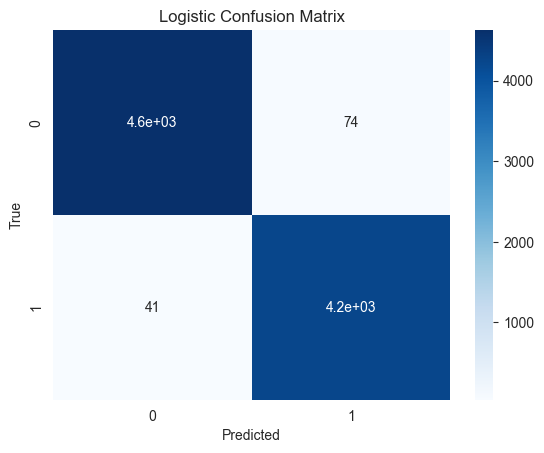

Logistic AUC-ROC: 0.9987990899988511


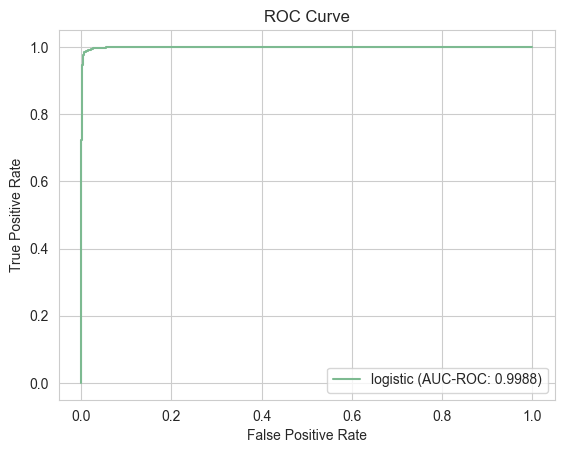

--------------------------------------------------
Decision tree Training Accuracy: 1.0
Decision tree Test Accuracy: 0.9966592427616926
Decision tree Confusion Matrix:
 [[4682   19]
 [  11 4268]]


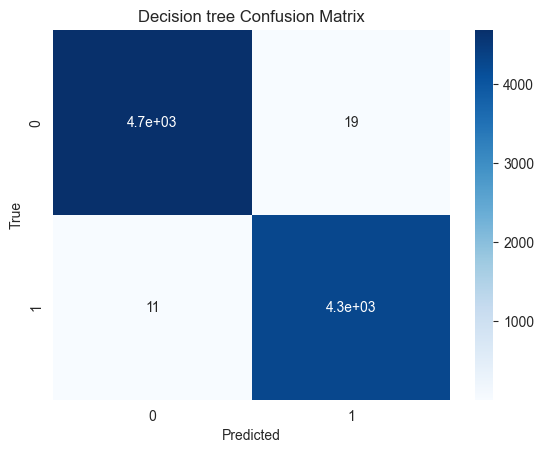

Decision tree AUC-ROC: 0.9966938063279214


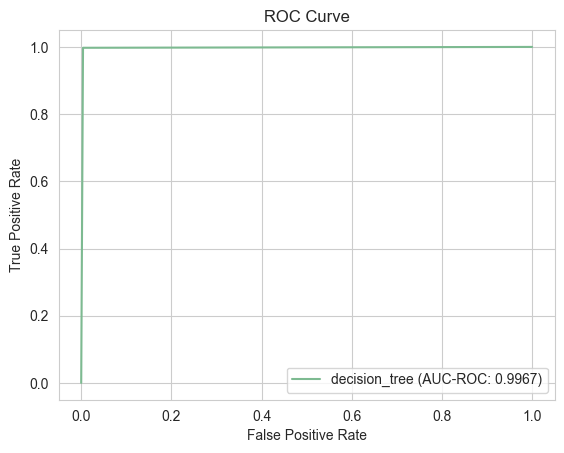

--------------------------------------------------
Random forest Training Accuracy: 1.0
Random forest Test Accuracy: 0.9930957683741648
Random forest Confusion Matrix:
 [[4671   30]
 [  32 4247]]


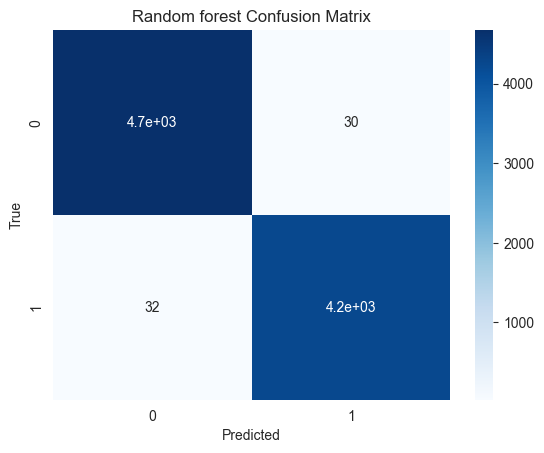

Random forest AUC-ROC: 0.9995987438392899


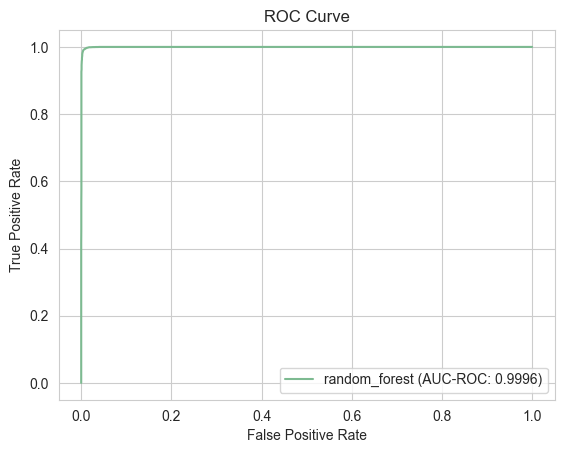

--------------------------------------------------


In [30]:
from sklearn.metrics import roc_curve  # Import roc_curve function
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

listt = []

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data['final2'], data['target'], test_size=0.2)

# Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Creating a combined pipeline with model training
pipeline_combined = Pipeline([
    ('model', LogisticRegression())  # Default model, will be replaced later
])

# Fit and evaluate each model in the combined pipeline
for model_name, model in [('logistic', LogisticRegression()), ('decision_tree', DecisionTreeClassifier()), ('random_forest', RandomForestClassifier())]:
  pipeline_combined.set_params(model=model)  # Set the current model in the pipeline

  # Fit the model on training data
  pipeline_combined.fit(X_train_vec, y_train)

  # Training accuracy
  y_pred_train = pipeline_combined.predict(X_train_vec)
  training_accuracy = accuracy_score(y_train, y_pred_train)
  print(f"{model_name.capitalize().replace('_', ' ')} Training Accuracy:", training_accuracy)

  # Test accuracy (already included in your original code)
  y_pred = pipeline_combined.predict(X_test_vec)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model_name.capitalize().replace('_', ' ')} Test Accuracy:", accuracy)
  listt.append(accuracy)

  # Confusion Matrix
  confusion_matrix_result = confusion_matrix(y_test, y_pred)
  print(f"{model_name.capitalize().replace('_', ' ')} Confusion Matrix:\n", confusion_matrix_result)

  # Confusion Matrix Visualization with Seaborn (Blue palette)
  sns.heatmap(confusion_matrix_result, annot=True, cmap="Blues")  # Use "Blues" colormap for blue palette
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"{model_name.capitalize().replace('_', ' ')} Confusion Matrix")
  plt.show()

  # AUC-ROC Score
  y_pred_proba = pipeline_combined.predict_proba(X_test_vec)[:, 1]  # Assuming binary classification, get probability of positive class
  auc_roc = roc_auc_score(y_test, y_pred_proba)
  print(f"{model_name.capitalize().replace('_', ' ')} AUC-ROC:", auc_roc)

  # AUC-ROC Visualization (Seaborn not ideal for ROC curve, using matplotlib)
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use the imported roc_curve function
  plt.plot(fpr, tpr, label=f'{model_name} (AUC-ROC: {auc_roc:.4f})')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

  print("-" * 50)  # Separator between models


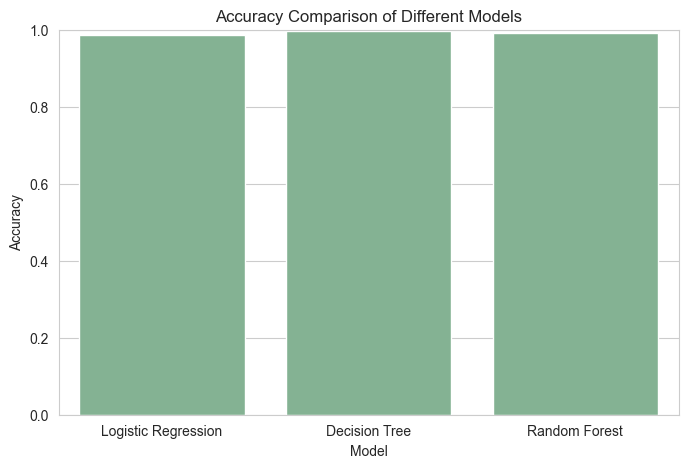

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = listt

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  
plt.show()
